In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-dataset/zomato.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/zomato-restaurants-dataset/zomato.csv')

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [5]:
del df['Unnamed: 0.1']
del df['Unnamed: 0']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant name        7105 non-null   object 
 1   restaurant type        7105 non-null   object 
 2   rate (out of 5)        7037 non-null   float64
 3   num of ratings         7105 non-null   int64  
 4   avg cost (two people)  7048 non-null   float64
 5   online_order           7105 non-null   object 
 6   table booking          7105 non-null   object 
 7   cuisines type          7105 non-null   object 
 8   area                   7105 non-null   object 
 9   local address          7105 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 555.2+ KB


In [7]:
df.isnull().sum()

restaurant name           0
restaurant type           0
rate (out of 5)          68
num of ratings            0
avg cost (two people)    57
online_order              0
table booking             0
cuisines type             0
area                      0
local address             0
dtype: int64

In [8]:
# Fill missing values with mode (most frequent value)
df['rate (out of 5)'] = df['rate (out of 5)'].fillna(df['rate (out of 5)'].mode()[0])
df['avg cost (two people)'] = df['avg cost (two people)'].fillna(df['avg cost (two people)'].mode()[0])

In [9]:
df.describe()

,rate (out of 5),num of ratings,avg cost (two people)
count,7105.000000,7105.000000,7105.000000
mean,3.507417,188.921042,538.358761
std,0.466242,592.171049,461.539596
min,1.800000,1.000000,40.000000
25%,3.200000,16.000000,300.000000
50%,3.500000,40.000000,400.000000
75%,3.800000,128.000000,600.000000
max,4.900000,16345.000000,6000.000000


In [10]:
df.nunique()

restaurant name          7105
restaurant type            81
rate (out of 5)            31
num of ratings            935
avg cost (two people)      65
online_order                2
table booking               2
cuisines type            2175
area                       30
local address              90
dtype: int64

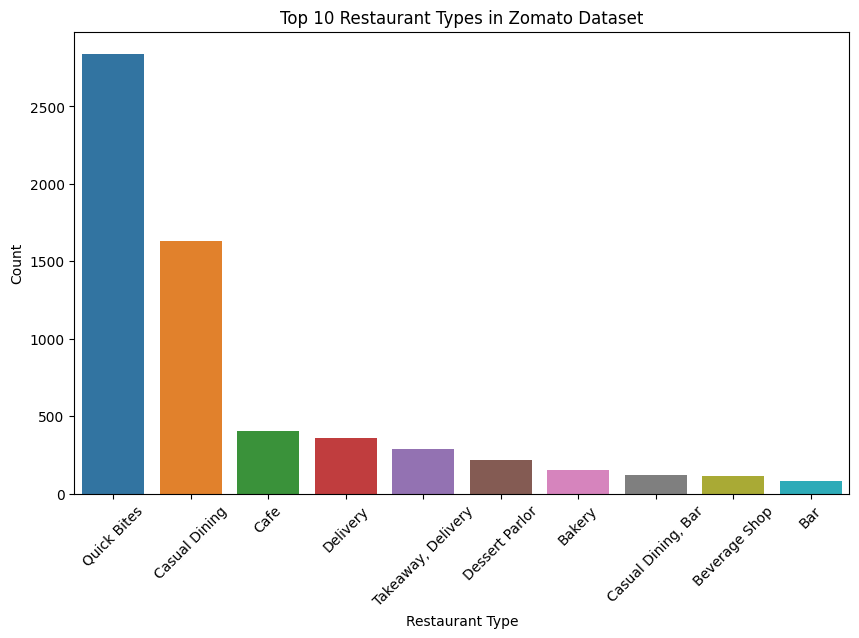

In [11]:
# Count plot for restaurant types
plt.figure(figsize=(10, 6))
sns.countplot(x='restaurant type', data=df, order=df['restaurant type'].value_counts().index[:10])
plt.title('Top 10 Restaurant Types in Zomato Dataset')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

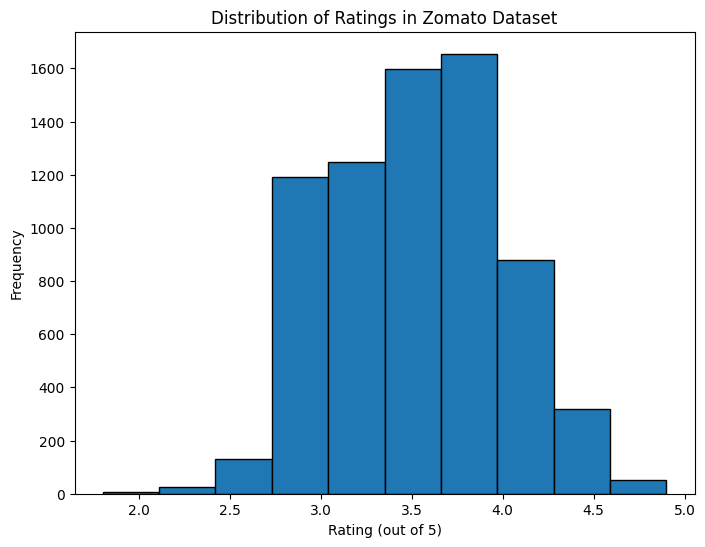

In [12]:
# Histogram for rating distribution
plt.figure(figsize=(8, 6))
plt.hist(df['rate (out of 5)'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings in Zomato Dataset')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='avg cost (two people)', ylabel='count'>

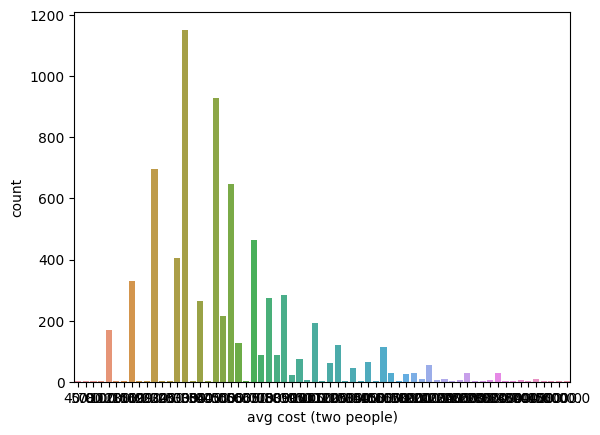

In [13]:
# Count plot of average cost for two people in Zomato dataset
couple_data=df['avg cost (two people)']
sns.countplot(x=couple_data)

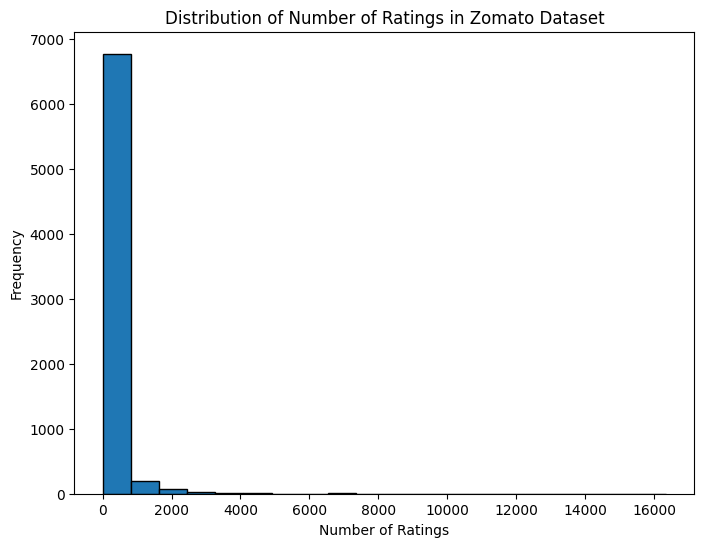

In [14]:
# Histogram for number of ratings distribution
plt.figure(figsize=(8, 6))
plt.hist(df['num of ratings'], bins=20, edgecolor='black')
plt.title('Distribution of Number of Ratings in Zomato Dataset')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


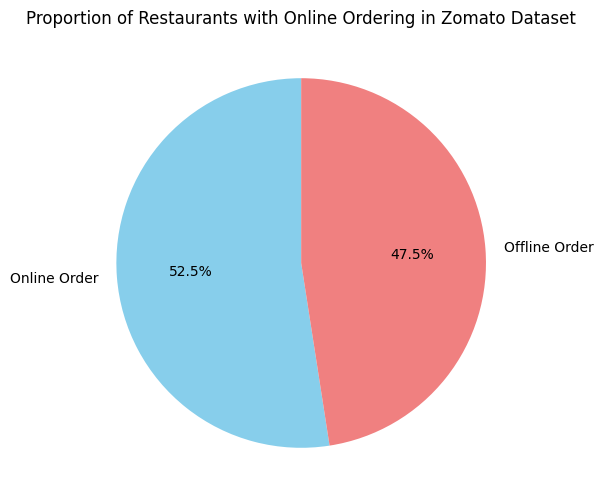

In [15]:
# Pie chart for online order proportion
online_order_counts = df['online_order'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(online_order_counts, labels=['Online Order', 'Offline Order'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Restaurants with Online Ordering in Zomato Dataset')
plt.show()

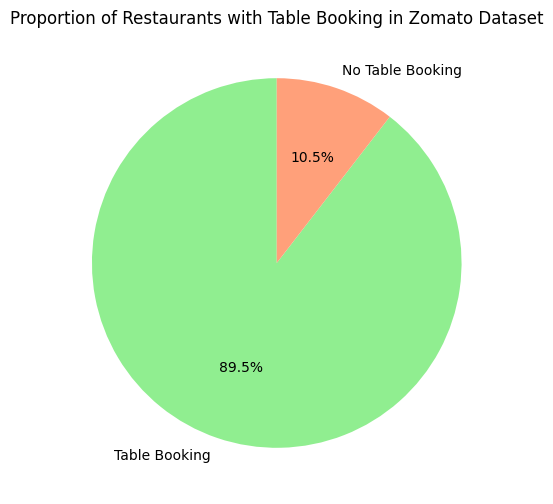

In [16]:
# Pie chart for table booking proportion
table_booking_counts = df['table booking'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(table_booking_counts, labels=['Table Booking', 'No Table Booking'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightsalmon'])
plt.title('Proportion of Restaurants with Table Booking in Zomato Dataset')
plt.show()